In [1]:
import tensorflow as tf
import numpy as np


In [2]:
(train_data, train_labels), (test_data, test_labels) =  tf.keras.datasets.reuters.load_data(
    path='reuters.npz', num_words=10000,
)

In [3]:
# Количество элементов в обучающей выборке
print(len(train_data))

8982


In [4]:
# Количество элементов в тестовой выборке
print(len(test_data))

2246


In [5]:
# Декодирование новостей обратно в текст

word_index = tf.keras.datasets.reuters.get_word_index(
    path='reuters_word_index.json'
)



# word_index = train_data.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.
items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [6]:
#Кодирование данных: 
def vectorize_sequences(sequences, dimension=10000):
     results = np.zeros((len(sequences), dimension))
     for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
     return results

x_train = vectorize_sequences(train_data) # Векторизованные обучающие данные
x_test = vectorize_sequences(test_data) # Векторизованные контрольные данные



In [7]:
# Функция one_hot кодирования
def to_one_hot(labels, dimension=46):
      results = np.zeros((len(labels), dimension))
      for i, label in enumerate(labels):
           results[i, label] = 1.
      return results

    
one_hot_train_labels = to_one_hot(train_labels)   #
one_hot_test_labels = to_one_hot(test_labels)     #

In [8]:

# Определение параметров модели

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))


#  Компиляция модели
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics = [ "acc" ])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# Разделение данных на проверочный и обучающий набор

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]


In [10]:

# Обучение модели
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val)
                   )


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 109us/sample - loss: 2.6007 - acc: 0.5148 - val_loss: 1.7566 - val_acc: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 90us/sample - loss: 1.4378 - acc: 0.7042 - val_loss: 1.3027 - val_acc: 0.7240
Epoch 3/20
7982/7982 [==============================] - 1s 86us/sample - loss: 1.0582 - acc: 0.7769 - val_loss: 1.1224 - val_acc: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 90us/sample - loss: 0.8345 - acc: 0.8262 - val_loss: 1.0346 - val_acc: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 89us/sample - loss: 0.6670 - acc: 0.8614 - val_loss: 0.9504 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 88us/sample - loss: 0.5352 - acc: 0.8882 - val_loss: 0.9203 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.4346 - acc: 0.9087 - val_loss: 0.9115 - val_acc:

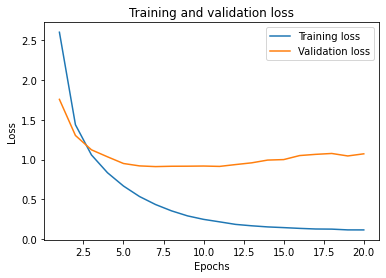

In [11]:
# Построение графиков потерь на этапах обучения и проверки

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

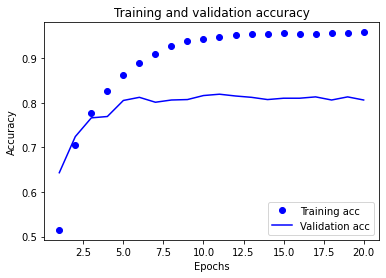

In [12]:
# Построение графиков точности на этапах обучения и проверки
plt.clf() # Очистить рисунок
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Как можно заметить из графика переобучение сети наступает примерно на девятой эпохе девятой эпохе. 
Изменим некоторые параметры обучения  сети до девятой эпохи и затем оценим получившийся результат на контрольных данных.

In [13]:
# Обучение новой модели с нуля
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
# Обучаем модель:
model.fit(partial_x_train,
              partial_y_train,
              epochs=9,
              batch_size=512,
              validation_data=(x_val, y_val)
         )
    
    


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 103us/sample - loss: 2.7181 - acc: 0.5160 - val_loss: 1.7546 - val_acc: 0.6370
Epoch 2/9
7982/7982 [==============================] - 1s 88us/sample - loss: 1.4537 - acc: 0.6981 - val_loss: 1.3364 - val_acc: 0.7090
Epoch 3/9
7982/7982 [==============================] - 1s 88us/sample - loss: 1.0900 - acc: 0.7640 - val_loss: 1.1689 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 88us/sample - loss: 0.8582 - acc: 0.8171 - val_loss: 1.0647 - val_acc: 0.7730
Epoch 5/9
7982/7982 [==============================] - 1s 92us/sample - loss: 0.6826 - acc: 0.8507 - val_loss: 0.9960 - val_acc: 0.7740
Epoch 6/9
7982/7982 [==============================] - 1s 87us/sample - loss: 0.5457 - acc: 0.8809 - val_loss: 0.9385 - val_acc: 0.7950
Epoch 7/9
7982/7982 [==============================] - 1s 87us/sample - loss: 0.4321 - acc: 0.9078 - val_loss: 0.9426 - val_acc: 0.8060

In [14]:
results = model.evaluate(x_test, one_hot_test_labels)
print('results = ', results)

2246/2246 [==============================] - 0s 221us/sample - loss: 0.9915 - acc: 0.7841
results =  [0.991481366586388, 0.78406054]


In [15]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1856634016028495

Это решение достигло точности  приблизительно в 80 %. Со сбалансированной задачей бинарной
классификации точность чисто случайного классификатора составила бы 50 %.
Однако в данном случае она близка к 19 %, то есть результат получился весьма
неплохим, по крайней мере в сравнении со случайным р.

In [16]:
# Получение предсказаний для новых данных
predictions = model.predict(x_test)


In [17]:
# Размерность одного элемента вектора составляет:
predictions[0].shape

(46,)

In [18]:
# Сумма элементов нулевого вектора равна:
np.sum(predictions[0])

0.9999998

In [19]:
# Максимальное значение, это значение предсказанное с наибольшей вероятностью:
np.argmax(predictions[0])

3

In [20]:
# метки также можно было бы преобразовать в тензор целых чисел:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [21]:
# С целочисленными метками следует использовать функцию sparse_categorical_crossentropy:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [22]:
# Модель с узким местом для информации
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))


# Компилируем модель
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc']
             )

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val)
         )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 112us/sample - loss: 3.2256 - acc: 0.2575 - val_loss: 2.5434 - val_acc: 0.5320
Epoch 2/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.9435 - acc: 0.6154 - val_loss: 1.6143 - val_acc: 0.6130
Epoch 3/20
7982/7982 [==============================] - 1s 98us/sample - loss: 1.3814 - acc: 0.6557 - val_loss: 1.4064 - val_acc: 0.6410
Epoch 4/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.1918 - acc: 0.6942 - val_loss: 1.3300 - val_acc: 0.6750
Epoch 5/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.0752 - acc: 0.7258 - val_loss: 1.2946 - val_acc: 0.6920
Epoch 6/20
7982/7982 [==============================] - 1s 97us/sample - loss: 0.9860 - acc: 0.7467 - val_loss: 1.2717 - val_acc: 0.7010
Epoch 7/20
7982/7982 [==============================] - 1s 98us/sample - loss: 0.9134 - acc: 0.7662 - val_loss: 1.2807 - val_acc:

In [23]:
results = model.evaluate(x_test, one_hot_test_labels)


2246/2246 [==============================] - 0s 75us/sample - loss: 1.8227 - acc: 0.6981
